In [26]:
from sklearn.cluster import SpectralCoclustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# Read csv file
whisky = pd.read_csv("whiskies.txt")
whisky["region"] = pd.read_csv("regions.txt")
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands


In [ ]:
# Construct flavors dataframe
flavors = whisky.iloc[:, 2:14]
flavors.head()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1


In [29]:
corr_flavors = pd.DataFrame(flavors.corr())
corr_whisky = pd.DataFrame(flavors.transpose().corr())

In [30]:
model = SpectralCoclustering(n_clusters=6, random_state=0)

In [ ]:
model.fit(corr_whisky)

SpectralCoclustering(n_clusters=6, random_state=0)

In [32]:
np.sum(model.rows_, axis=1)

array([20,  5, 19, 17,  6, 19])

In [33]:
np.sum(model.rows_, axis=0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [34]:
model.columns_

array([[False, False, False, False, False,  True, False, False, False,
        False, False,  True, False,  True, False, False,  True, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True, False,
        False, False,  True, False,  True, False, False, False, False,
         True, False,  True,  True, False, False, False, False, False,
         True, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False,  True, False, False,
         True, False, False, False, False, False, False, False,  True,
        False, False,  True, False,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  Tru

In [ ]:
whisky["Group"] = pd.Series(model.row_labels_, index=whisky.index)
whisky = whisky.iloc[np.argsort(model.row_labels_)]

In [42]:
whisky = whisky.reset_index(drop=True)
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,region,Group
0,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850,Highlands,0
1,34,GlenElgin,2,3,1,0,0,2,1,1,1,1,2,3,IV30 3SL,322640,861040,Speyside,0
2,33,GlenDeveronMacduff,2,3,1,1,1,1,1,2,0,2,0,1,AB4 3JT,372120,860400,Speyside,0
3,41,GlenSpey,1,3,1,0,0,0,1,1,1,2,0,2,AB38 7AU,327760,849140,Speyside,0
4,46,Glenfiddich,1,3,1,0,0,0,0,0,0,2,2,2,AB55 4DH,332680,840840,Speyside,0


In [43]:
correlations = pd.DataFrame(whisky.iloc[:, 2:14].T).corr()

In [44]:
correlations = np.array(correlations)

In [45]:
correlations

array([[1.        , 0.44904168, 0.46216816, ..., 0.50475261, 0.34921515,
        0.26722197],
       [0.44904168, 1.        , 0.28977485, ..., 0.62335961, 0.74444508,
        0.7000808 ],
       [0.46216816, 0.28977485, 1.        , ..., 0.03309517, 0.07784989,
        0.16547585],
       ...,
       [0.50475261, 0.62335961, 0.03309517, ..., 1.        , 0.76520727,
        0.6626506 ],
       [0.34921515, 0.74444508, 0.07784989, ..., 0.76520727, 1.        ,
        0.76520727],
       [0.26722197, 0.7000808 , 0.16547585, ..., 0.6626506 , 0.76520727,
        1.        ]])

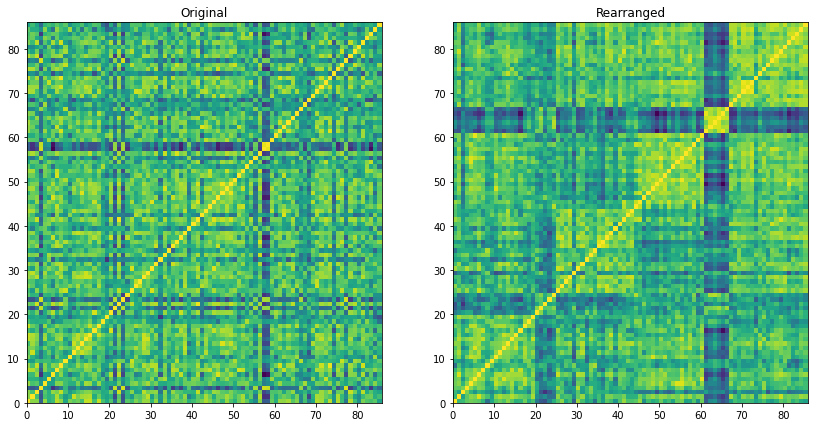

In [ ]:
plt.figure(figsize=(14, 7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("Original")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranged")
plt.axis("tight")
plt.show()